## - NHANES Data: [NHANES 2021-2023](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2021-2023)
- **Marital Status** (`DMDMARTZ`) - created categorical DMDMARTZ_group, recoding (married or not married). - ***DEMO_L.xpt***
- **Education Level** (`DMDEDUC2`) - created categorical DMDEDUC2_group,recoding (bachelor’s or higher vs. less than bachelor’s). - ***DEMO_L.xpt***
- **Age in Years** (`RIDAGEYR`) - continuous.- ***DEMO_L.xpt***
- **Systolic Blood Pressure** (`BPXOSY3`) - continuous. - ***BPXO_L_Doc.xpt***
- **Diastolic Blood Pressure** (`BPXODI3`) - continuous. - ***BPXO_L_Doc.xpt***
- **Vitamin D Lab Interpretation** (`LBDVD2LC`) - categorical, two levels (remove values with null).- ***VID_L.xpt***
- **Hepatitis B Lab Antibodies** (`LBXHBS`) - categorical, needs recoding to two levels.- ***HEPB_S_L.xpt***
- **Weak/Failing Kidneys** (`KIQ022`) - categorical, can be treated as two levels (remove values `7`, `9`, and null). - ***KIQ_U_L.xpt***
- **Minutes of Sedentary Behavior** (`PAD680`) - continuous, needs cleaning (remove values `7777`, `9999`, and null).- ***PAQ_L.xpt***
- **Current Self-Reported Weight** (`WHD020`) - continuous, needs cleaning (remove values `7777`, `9999`, and null).- ***WHQ_L.xpt***eeds cleaning (remove values `7777`, `9999`, and null).- ***WHQ_L.xpt***
## Link to CoLab Notebook
- [NHANES 2021-2023 Analysis Python Notebook](https://colab.research.google.com/drive/1qrM4do95rdLeDrTDkWrTbzcGkrAx90Ta#scrollTo=BJkablvnwLaW)

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
import seaborn as sns

In [267]:
# Download data set to pandas DataFrame
# storage url path = 'https://storage.googleapis.com/mledu-datasets/'
xpt_hepb_data = pd.read_sas("/content/HEPB_S_L.xpt")
xpt_demo_data = pd.read_sas("/content/DEMO_L.xpt")
xpt_bpxo_data = pd.read_sas("/content/BPXO_L.xpt")
xpt_kiq_data = pd.read_sas("/content/KIQ_U_L.xpt")
xpt_whq_data = pd.read_sas("/content/WHQ_L.xpt")
xpt_vid_data = pd.read_sas("/content/VID_L.xpt")
xpt_paq_data = pd.read_sas("/content/PAQ_L.xpt")

**Clean data tables by removing "Missing", "Don't Know", and "Refused" data points from responders.**

In [268]:
# Clean column names by removing 'Missing', 'Don't know', 'Refused' data points
# https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PAQ_L.htm
paq_data_clean = xpt_paq_data[(xpt_paq_data.PAD680.notna()) &
                              (xpt_paq_data.PAD680 != 7777) &
                              (xpt_paq_data.PAD680 != 9999)]
# https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/WHQ_L.htm
whq_data_clean = xpt_whq_data[(xpt_whq_data.WHD020.notna()) &
                                (xpt_whq_data.WHD020 != 7777) &
                                (xpt_whq_data.WHD020 != 9999)]
#https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.htm  --7772
demo_data_clean = xpt_demo_data[(xpt_demo_data.DMDMARTZ.notna()) &
                                  (xpt_demo_data.DMDMARTZ != 77) &
                                  (xpt_demo_data.DMDMARTZ != 9) &
                                  (xpt_demo_data.DMDEDUC2.notna()) &
                                  (xpt_demo_data.DMDEDUC2 != 7) &
                                  (xpt_demo_data.DMDEDUC2 != 9)]
#https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.htm#BPXOSY3
#https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.htm#BPXODI3
bpxo_data_clean = xpt_bpxo_data[(xpt_bpxo_data.BPXOSY3.notna()) &
                                (xpt_bpxo_data.BPXODI3.notna())]
#https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/KIQ_U_L.htm#KIQ022
kiq_data_clean = xpt_kiq_data[(xpt_kiq_data.KIQ022.notna()) &
                                (xpt_kiq_data.KIQ022 != 7) &
                                (xpt_kiq_data.KIQ022 != 9)]
#https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/VID_L.htm#LBDVD2LC
vid_data_clean = xpt_vid_data[xpt_vid_data.LBDVD2LC.notna()]


##Questions for Analysis

##Question 1: Is there an association between marital status (married or not married) and education level (bachelor’s degree or higher vs. less than a bachelor’s degree)?  
     - Variables: `DMDMARTZ` (marital status) and `DMDEDUC2` (education level). Recode as specified.

 Solution model selection process:
  - Model Selected = Chi-Square Test
  - IV = Marital Status
  - DV = Education Level
  
  Since marital status and education level are both categorical variables, a Chi-Square test would be best to determine if there is a correlation between marital status and education levels.

There appears to be an association between marital status and education level with a large chi-square value of 128.89 and an extremely small p-value < 7.17e-30, which is close to zero, strongly indicating an association.

## DEMO_L.xpt [DMDMARTZ , DMDEDUC2]
### DMDMARTZ -Marital Status
|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
| 1	           | Married/Living with partner | 4136	 | 4136	      |
| 2	           | Widowed/Divorced/Separated	 | 2022	 | 6158	      |
| 3	           | Never married	             | 1625	 | 7783	      |
| 77           | Refused	                   | 4	   | 7787	      |
| 99           | Don't know	                 | 5	   | 7792	      |
| .	           |Missing	                     | 4141	 | 11933	    |

### DMDEDUC2 -Education Level
|Code or Value | Value Description                                 | Count | Cumulative |
| ------------ | ------------------------------------------------- | ----- | -----------|
| 1	          | Less than 9th grade                               |	373	| 373        |
| 2	          | 9-11th grade (Includes 12th grade with no diploma)| 666   |1039        |
| 3	          | High school graduate/GED or equivalent            | 1749  |2788        |
| 4	          | Some college or AA degree	                      | 2370  | 5158       |
| 5	          | College graduate or above                         | 2625  | 7783       |
| 7	          | Refused	                                          | 0     | 7783       |
| 9	          | Don't know	                                     | 11    | 7794       |
| .	          | Missing	                                          | 4139  | 11933      |


In [269]:
# Create a new column for the grouped marital status --> if DMDMARTZ = 1 then married else not married
demo_data_clean['DMDMARTZ_group'] = demo_data_clean['DMDMARTZ'].apply(lambda x: 'Married' if x == 1 else 'Not Married')
# Create a new column for the grouped education level --> if DMDEDUC2 = 5 then bachelor_or_higher else less_than_bachelor
demo_data_clean['DMDEDUC2_group'] = demo_data_clean['DMDEDUC2'].apply(lambda x: 'Bachelor_or_higher' if x == 5 else 'less_than_Bachelor')

/tmp/ipython-input-135431703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_data_clean['DMDMARTZ_group'] = demo_data_clean['DMDMARTZ'].apply(lambda x: 'Married' if x == 1 else 'Not Married')
/tmp/ipython-input-135431703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_data_clean['DMDEDUC2_group'] = demo_data_clean['DMDEDUC2'].apply(lambda x: 'Bachelor_or_higher' if x == 5 else 'less_than_Bachelor')


In [270]:
# Create a contingency table of the two grouped variables
contingency_table = pd.crosstab(demo_data_clean['DMDMARTZ_group'], demo_data_clean['DMDEDUC2_group'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-square statistic: 128.88980926694455
P-value: 7.168986857098456e-30
Degrees of freedom: 1


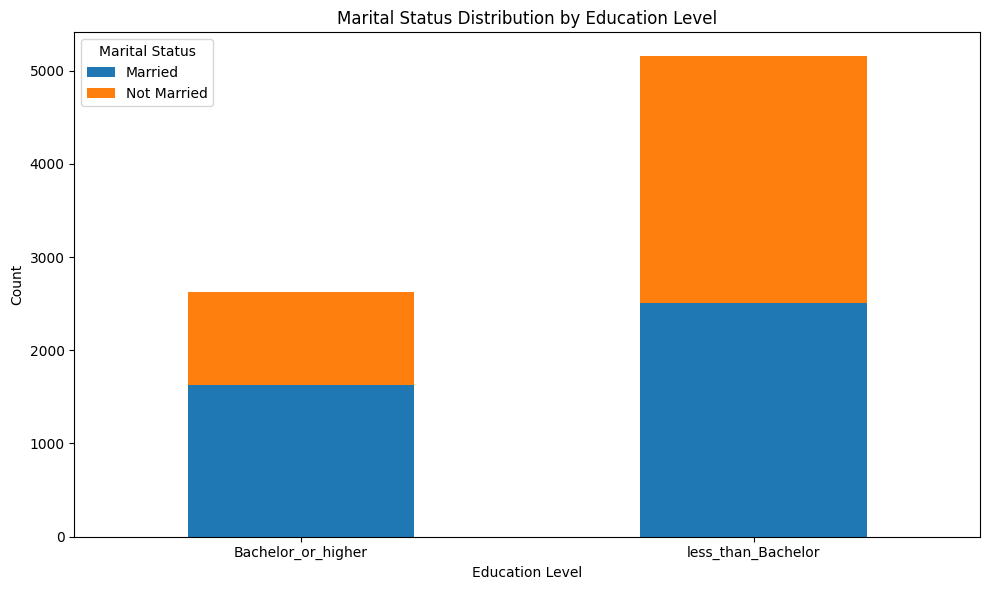

In [271]:

# Create a crosstab for plotting
plot_data = pd.crosstab(demo_data_clean['DMDEDUC2_group'], demo_data_clean['DMDMARTZ_group'])

# Create a stacked bar plot
plot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Marital Status Distribution by Education Level")
plt.xticks(rotation=0) # Rotate x-axis labels if needed for readability
plt.legend(title="Marital Status")
plt.tight_layout()

# Display the plot
plt.show()

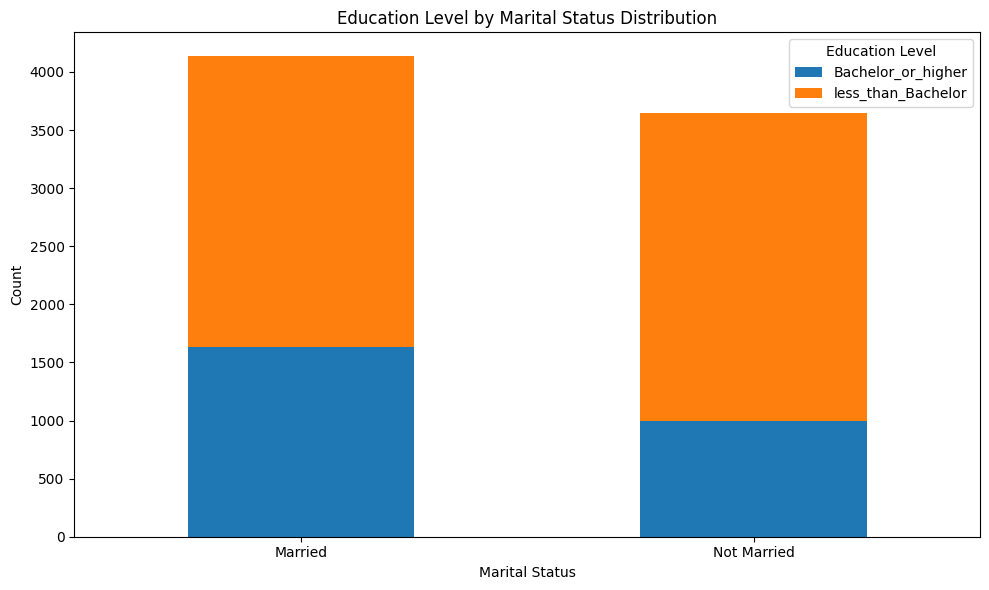

In [272]:
# Create a crosstab for plotting
plot_data = pd.crosstab(demo_data_clean['DMDMARTZ_group'],demo_data_clean['DMDEDUC2_group'])

# Create a stacked bar plot
plot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Education Level by Marital Status Distribution")
plt.xticks(rotation=0) # Rotate x-axis labels if needed for readability
plt.legend(title="Education Level")
plt.tight_layout()

# Display the plot
plt.show()

  ## Question 2: Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?  
     - Variables: `DMDMARTZ` (marital status, recoded) and `PAD680` (sedentary behavior time, cleaned).

 Solution model selection process:
  - Model Selected = T-Test
  - IV = Martial status
  - DV = Means Sednarry behavior time

- Since the dependent variable (Mean Sedentary behavior time) is numerical and the independent variable (Marital Status) is categorical with two groups, a T-Test would be best to determine if there is a different in mean sedentary behavior time among marital status groups (married vs. not married).

Based on the results, there is a difference in the mean sedentary behavior time between married and not married people.
Married: 353.21 minutes vs Not Married: 371.93 minutes.
The not married group is more likely to have sedentary behavior.

## DEMO_L.xpt [DMDMARTZ] & PAQ_L.xpt [PAD680]
### PAD680 - Minutes sedentary activity
|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
|0 to 1380	   |Range of Values              |8065   |8065        |
|7777	         |Refused	                     |6	     |8071	      |
|9999	         |Don't know	                 |67	   |8138	      |
|.	           |Missing	                     |15	   |8153	      |

### DMDMARTZ -Marital Status
|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
| 1	           | Married/Living with partner | 4136	 | 4136	      |
| 2	           | Widowed/Divorced/Separated	 | 2022	 | 6158	      |
| 3	           | Never married	             | 1625	 | 7783	      |
| 77           | Refused	                   | 4	   | 7787	      |
| 99           | Don't know	                 | 5	   | 7792	      |
| .	           |Missing	                     | 4141	 | 11933	    |

In [273]:
# Merge the demo and PAQ dataframes on the 'SEQN' column
paq_merged_data = pd.merge(demo_data_clean, paq_data_clean, on='SEQN', how='inner')


In [274]:
# Create two dataframe of married vs not married to prepare for T-test
paq_married = paq_merged_data[paq_merged_data['DMDMARTZ_group'] == 'Married']
paq_not_married = paq_merged_data[paq_merged_data['DMDMARTZ_group'] == 'Not Married']
#

In [275]:
# T-Test married vs not married using the PAD680 column
paq_t_test_result = ttest_ind(paq_married['PAD680'], paq_not_married['PAD680'])

# Print the results of the T-test
print(paq_t_test_result)

TtestResult(statistic=np.float64(-3.8817747797702977), pvalue=np.float64(0.00010456289200203363), df=np.float64(7702.0))


In [276]:
# Calculate the mean of PAD680 for married and not married groups
mean_sedentary_married = paq_married['PAD680'].mean()
mean_sedentary_not_married = paq_not_married['PAD680'].mean()

# Print the means
print(f"Mean sedentary behavior time for married individuals: {mean_sedentary_married:.2f} minutes")
print(f"Mean sedentary behavior time for not married individuals: {mean_sedentary_not_married:.2f} minutes")

Mean sedentary behavior time for married individuals: 353.21 minutes
Mean sedentary behavior time for not married individuals: 371.93 minutes


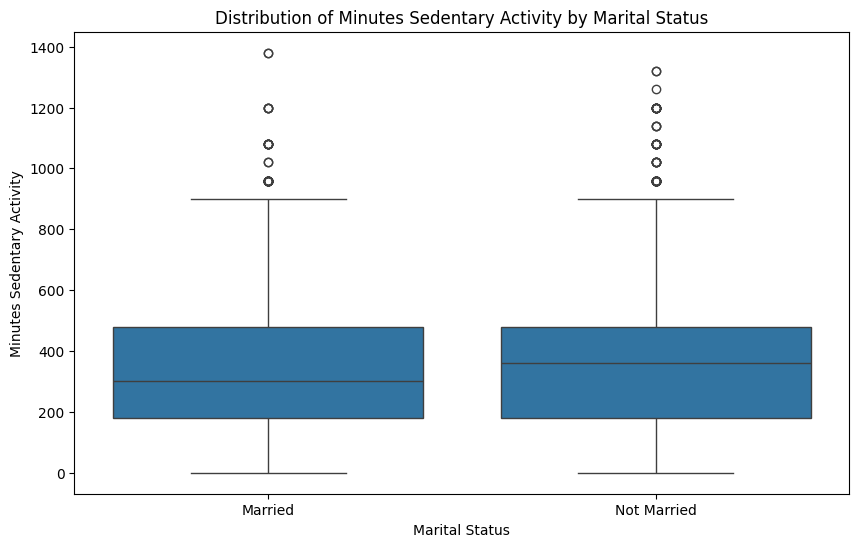

In [277]:

# Create a box plot to visualize the distribution of sedentary behavior time by marital status
plt.figure(figsize=(10, 6))
sns.boxplot(x='DMDMARTZ_group', y='PAD680', data=paq_merged_data)

# Add labels and title
plt.xlabel("Marital Status")
plt.ylabel("Minutes Sedentary Activity")
plt.title("Distribution of Minutes Sedentary Activity by Marital Status")

# Display the plot
plt.show()

  ## Question 3: How do age and marital status affect systolic blood pressure?
     - Variables: `RIDAGEYR` (age), `DMDMARTZ` (marital status, recoded), and `BPXOSY3` (systolic blood pressure).

Solution model selection process:
- Model Selected = Multiple Linear Regression
- IV = Age
- IV = Marital status
- DV = Systolic blood pressure

- Since the dependent variable (Systolic blood pressure) is continuous and there are two independent variables (Age, which is continuous, and Marital Status, which is categorical with two groups), a multiple linear regression would be best to determine how age and marital status affect systolic blood pressure.

The linear regression test results indicate that as Age [RIDAGEYR] increases, systolic pressure also increases with a low p-value of zero (0.00), strongly indicating a high association.
The marital status [DMDMARTZ] estimate of 1.3382 indicates that the not married group has a higher systolic pressure. The p-value of 0.003 is less than 0.05, which strongly indicates a correlation between marital status and systolic blood pressure.

In [278]:
# Omitting 'Missing' age
demo_data_clean = demo_data_clean[(demo_data_clean.RIDAGEYR.notna())]
# Merge the bpxo_data_clean dataframes on the 'SEQN' column with demo_clean_with_age
bxpxo_merged_data = pd.merge(demo_data_clean, bpxo_data_clean, on='SEQN', how='inner')
# Since this question compares 2 categories (ages and marital status) with systolic pressure linear regression method was selected for this analysis

In [279]:
# Create two dataframe of married vs not married to prepare for linear regression test
bpxo_married = bxpxo_merged_data[bxpxo_merged_data['DMDMARTZ_group'] == 'Married']
bxpxo_not_married = bxpxo_merged_data[bxpxo_merged_data['DMDMARTZ_group'] == 'Not Married']


In [280]:
# Perform linear regression
regression_result = smf.ols(formula='BPXOSY3 ~ RIDAGEYR + DMDMARTZ_group', data=bxpxo_merged_data).fit()

# Print the summary of the regression
print(regression_result.summary())


                            OLS Regression Results                            
Dep. Variable:                BPXOSY3   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     453.1
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          1.25e-183
Time:                        05:46:23   Log-Likelihood:                -24856.
No. Observations:                5838   AIC:                         4.972e+04
Df Residuals:                    5835   BIC:                         4.974e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

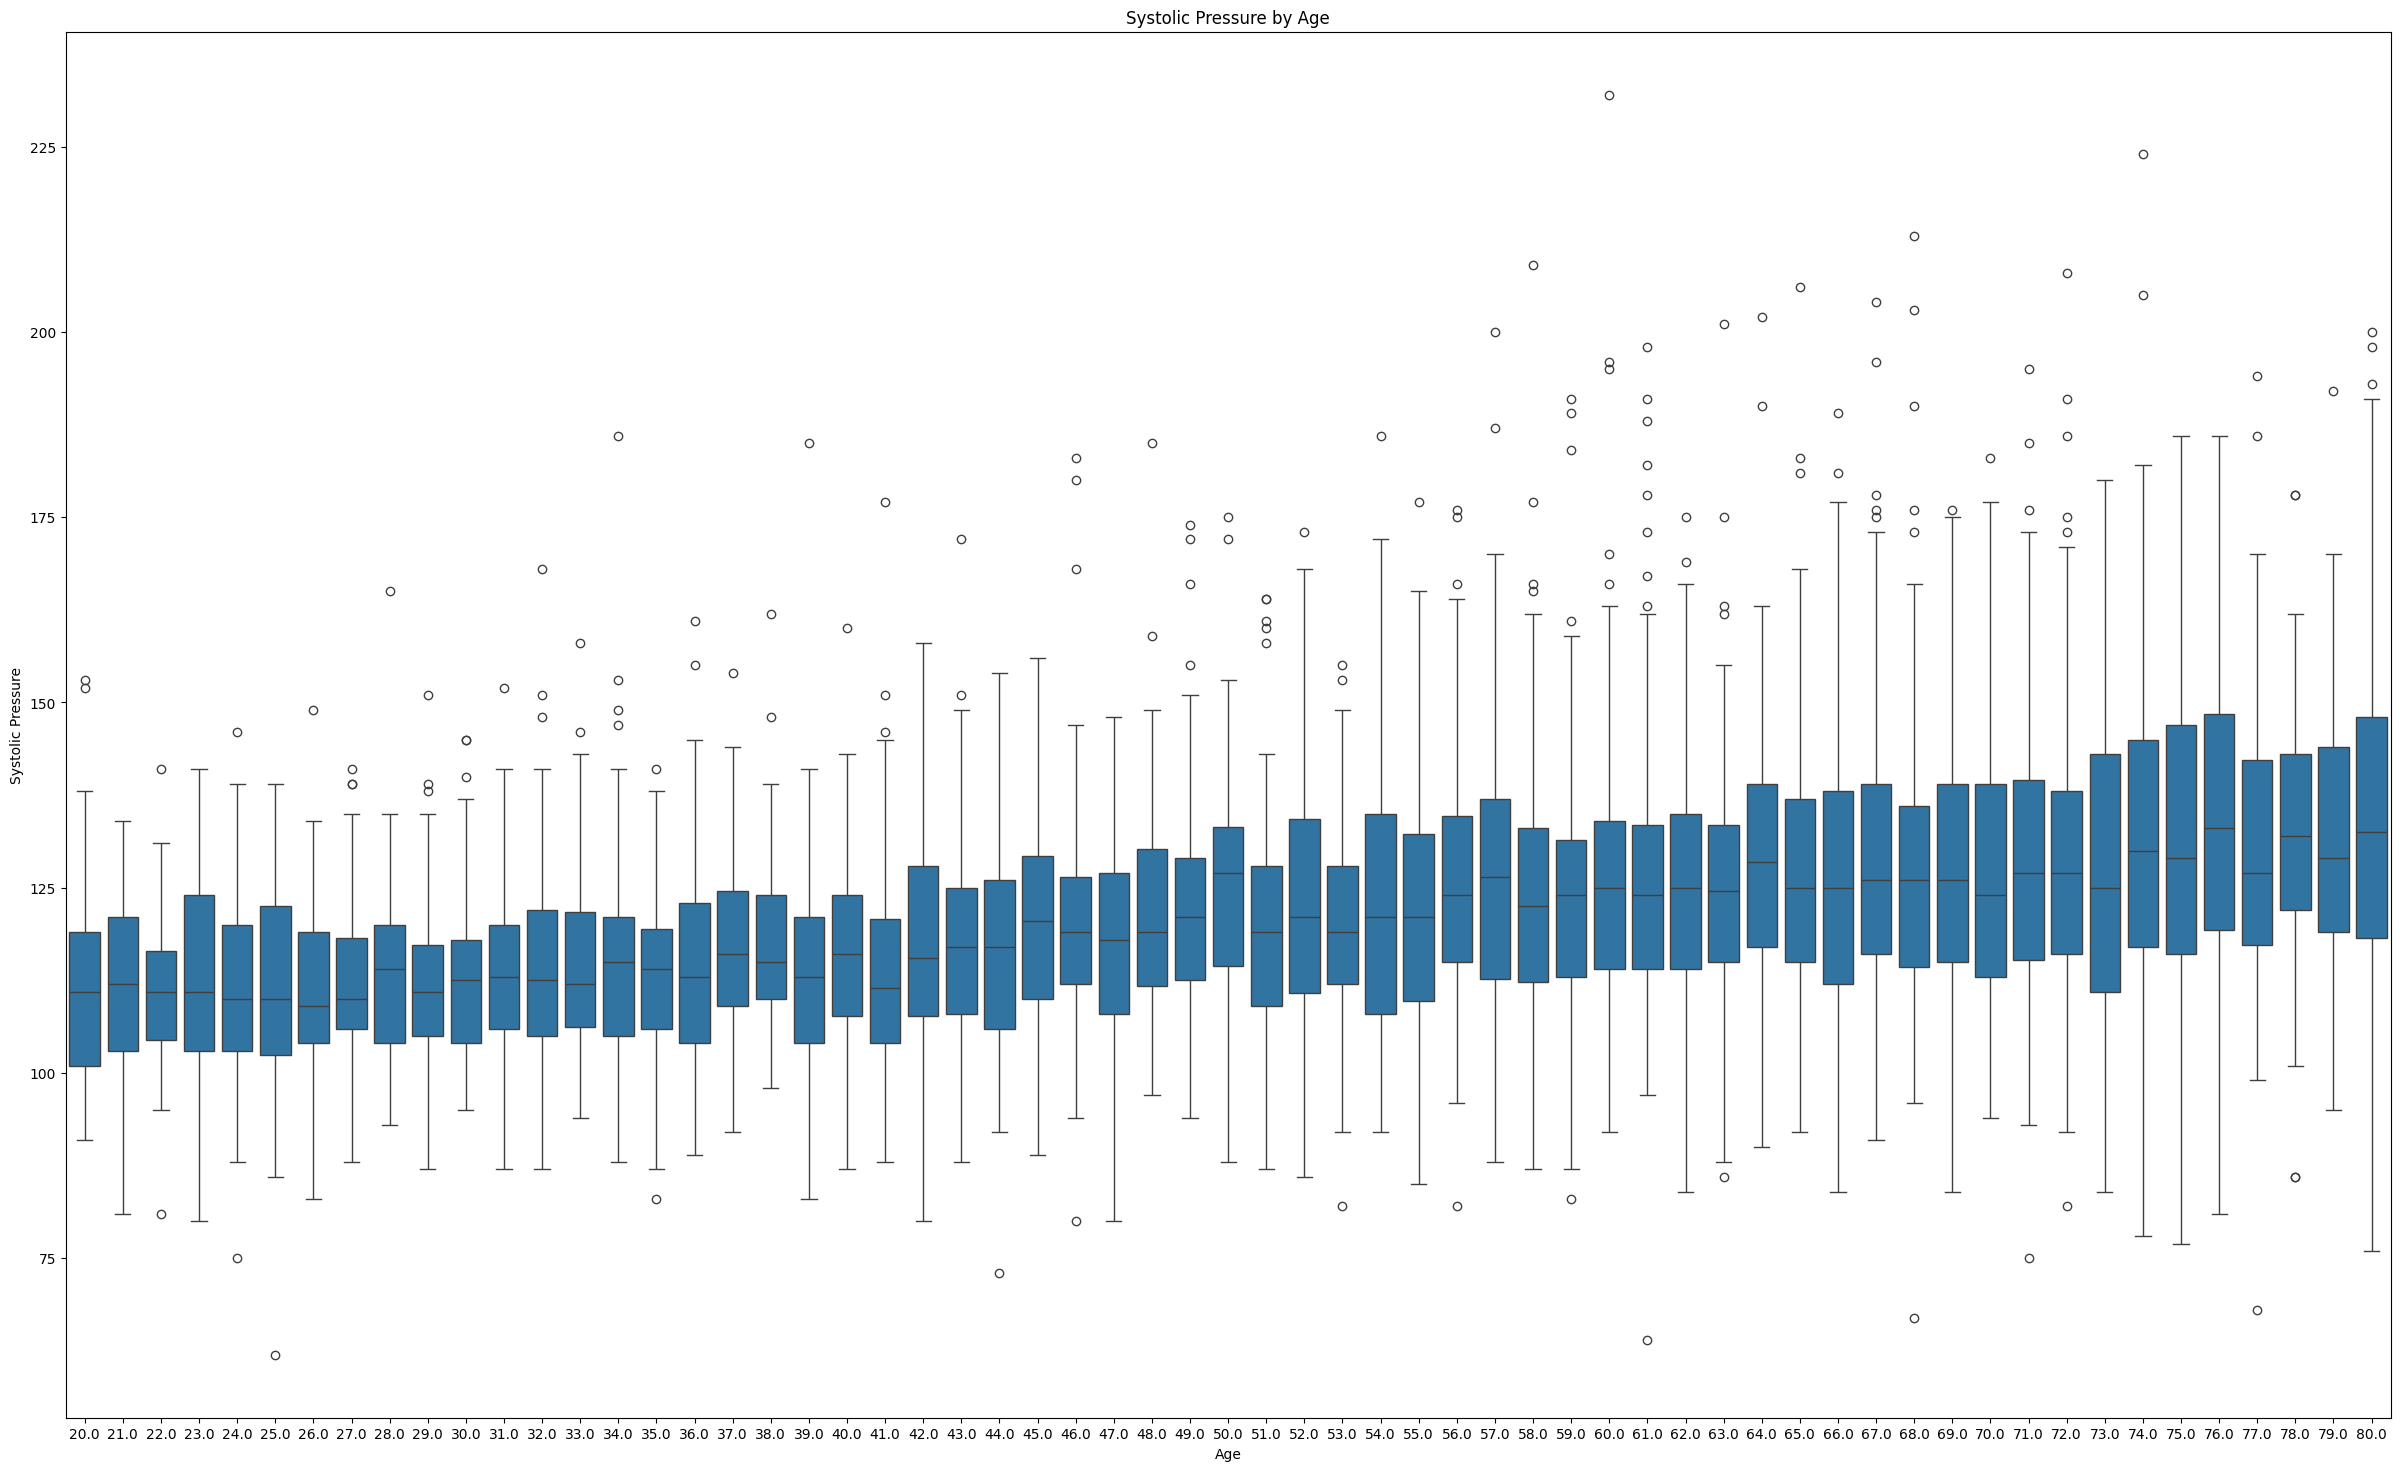

In [281]:

# Create a box plot to visualize the distribution of Systolic Pressure by Age
plt.figure(figsize=(30, 18))
sns.boxplot(x='RIDAGEYR', y='BPXOSY3', data=bxpxo_merged_data)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Systolic Pressure")
plt.title("Systolic Pressure by Age")

# Display the plot
plt.show()

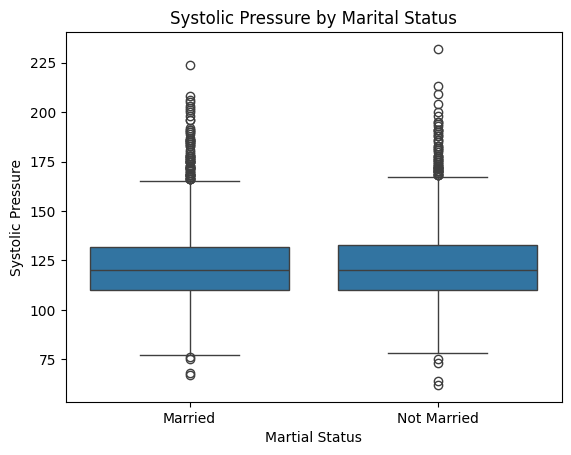

In [282]:
# plot visualziation of systolic pressure by marital status
sns.boxplot(x='DMDMARTZ_group', y='BPXOSY3', data=bxpxo_merged_data)

# Add labels and title
plt.xlabel("Martial Status")
plt.ylabel("Systolic Pressure")
plt.title("Systolic Pressure by Marital Status")

# Display the plot
plt.show()

 ## Question 4: Is there a correlation between self-reported weight and minutes of sedentary behavior?  
     - Variables: `WHD020` (self-reported weight, cleaned) and `PAD680` (sedentary behavior time, cleaned).

Solution model selection process:
- Model Selected = Linear Regression
- IV = Self-reported weight
- DV = Minutes of Sedentary behavior

- Since both the independent variable (self-reported weight) and the dependent variable (minutes of sedentary behavior) are continuous variables, a simple linear regression would be best to determine the correlation between them.

The linear regression test results indicate a weak correlation between reported weight and physical inactivity with an adjusted R-squared value of 0.024.

## WHQ_L.xpt [WHD050] & PAQ_L.xpt [PAD680]
### WHD050 - Self-reported weight - 1 yr ago (pounds)
|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
|67 to 530	   |Range of Values              |8272	 |8272        |
|7777	         |Refused	                     |33	   |8305        |
|9999	         |Don't know	                 |181	   |8486        |
|.	           |Missing	                     |15	   |8501	      |


### PAD680 - Minutes sedentary activity
|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
|0 to 1380	   |Range of Values              |8065   |8065        |
|7777	         |Refused	                     |6	     |8071	      |
|9999	         |Don't know	                 |67	   |8138	      |
|.	           |Missing	                     |15	   |8153	      |

In [283]:
# Merge the whq_data_clean dataframes on the 'SEQN' column with paq_data_clean on SEQN
whq_merged_data = whq_data_clean.merge( paq_data_clean, on='SEQN', how='inner')


In [284]:
# Perform linear regression
regression_result = smf.ols(formula='PAD680 ~ WHD020', data=whq_merged_data).fit()

# Print the summary of the regression
print(regression_result.summary())

# The results indicate a weak correlation between reported weight and physical activity with adjusted R-squred value of 0.024

                            OLS Regression Results                            
Dep. Variable:                 PAD680   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     198.3
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.70e-44
Time:                        05:46:25   Log-Likelihood:                -53698.
No. Observations:                7954   AIC:                         1.074e+05
Df Residuals:                    7952   BIC:                         1.074e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    239.3241      9.010     26.563      0.0

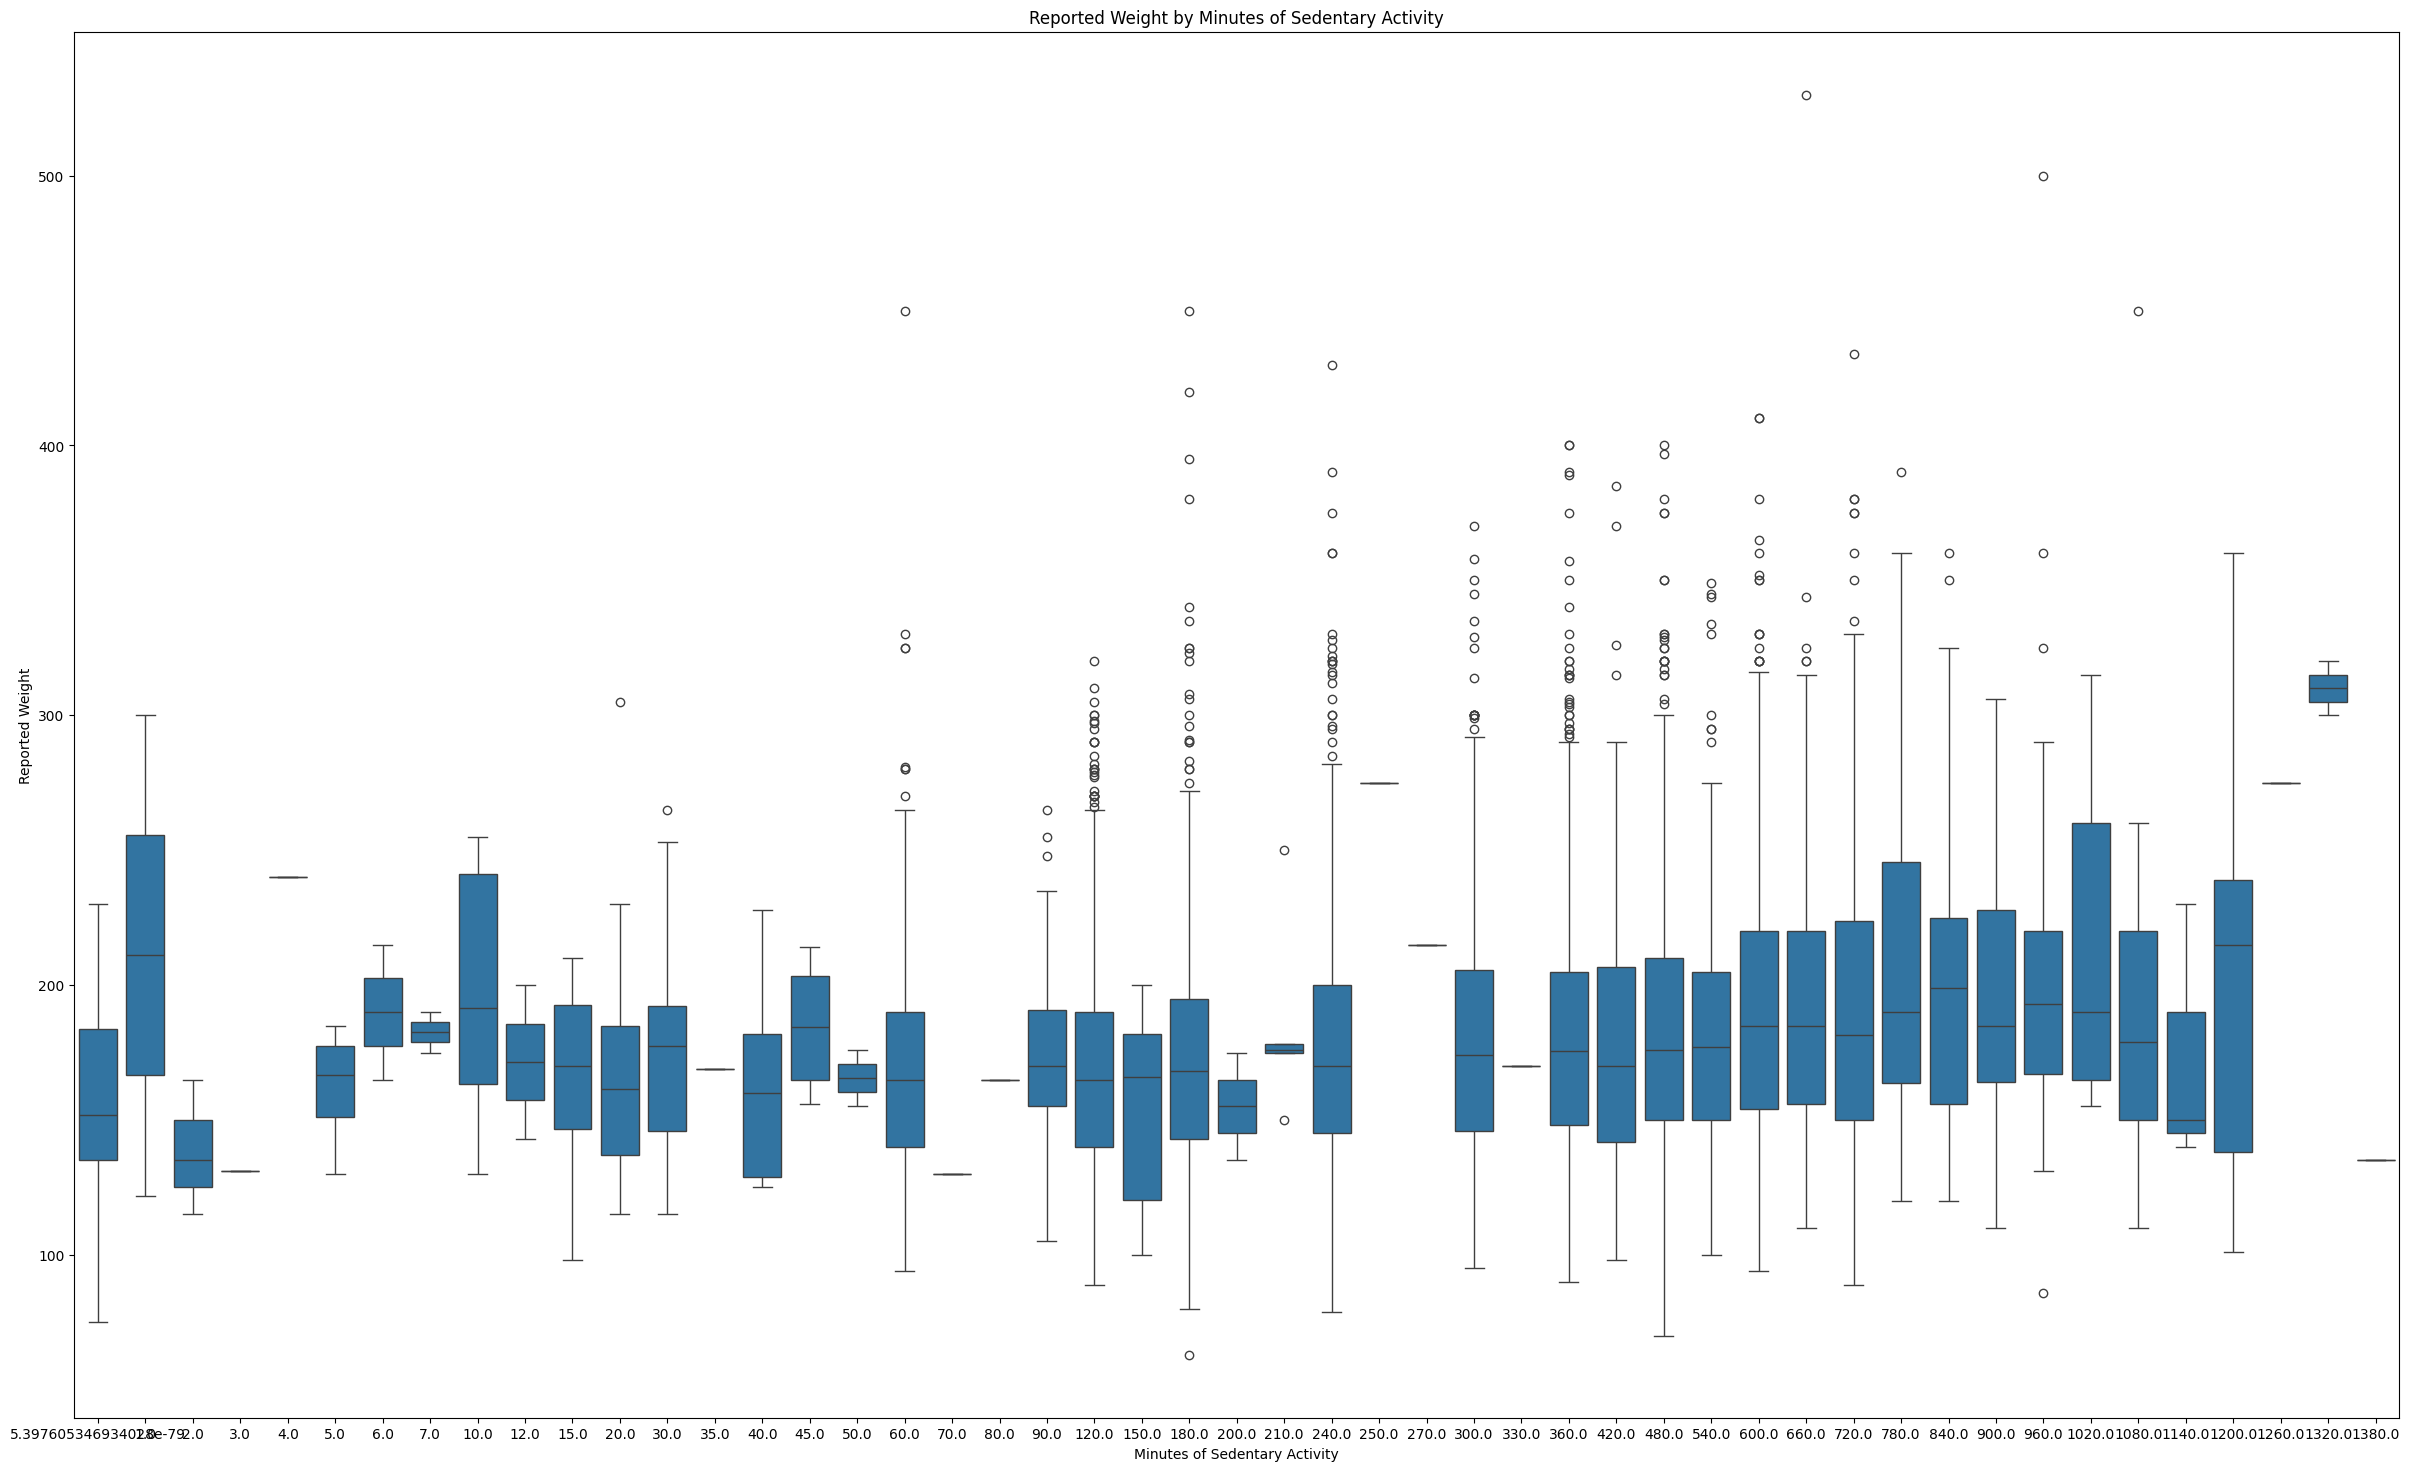

In [285]:
# plot difference physical activity and patient reported weight
plt.figure(figsize=(30, 18))
sns.boxplot(x='PAD680', y='WHD020', data=whq_merged_data)

# Add labels and title
plt.xlabel("Minutes of Sedentary Activity")
plt.ylabel("Reported Weight")
plt.title("Reported Weight by Minutes of Sedentary Activity")

# Display the plot
plt.show()

  ## Question 5 (Creative Analysis): Develop your own unique question using at least one of the variables listed above. Ensure that your question can be answered using one of the following tests: chi-square, t-test, ANOVA, or correlation. Clearly state your question, explain why you chose the test, and document your findings.

  # How does vitamin D levels and Kidney failure affect diastolic pressure?
  - Variables: `BPXODIE` diastolic - 3rd oscillometric reading, `LBDVD2LC` vitamin D, and `KIQ022` kindey failure.
  - The selection of this question is related to the following research
      - https://pmc.ncbi.nlm.nih.gov/articles/PMC4101586/
      - https://pubmed.ncbi.nlm.nih.gov/39906471/

Solution model selection process:
- Model Selected = 2-way NOVA
- IV = Vitamin D level
- IV = Kidney failure
- DV = Diastolic Pressure

- Since the dependent variable (Diastolic Pressure) is continuous numerical value and the two indepenent variables are categorical with two values Yes vs No (Kidney falure)  and  Below lower detection limit vs At or above the detection limit for Vitamin D levels, a 2-way NOVA would be best to determine whether vitamin D levels and kidney failure affects diastolic pressure.

## VID_L.xpt [LBDVD2LC] & KIQ_U_L.xpt[KIQ022] ->BPXODI3_L.xpt[BPXODI3]

### LBDVIDLC - 25OHD2+25OHD3 comment code (Vitamin D levels)
|Code or Value | Value Description              | Count | Cumulative |
| ------------ | ------------------------------ | ----- | -----------|
| 0	           |At or above the detection limit	|7307	  |7307        |
| 1	           |Below lower detection limit	    |0	    |7307        |
| .	           |Missing	                        |1420	  |8727	       |


### KIQ022 - Ever told you had weak/failing kidneys? (Kidney Failure)
|Code or Value | Value Description | Count | Cumulative | Skip to Item|
| ------------ | ----------------- | ----- | -----------|-------------|
| 1	           | Yes               | 321	 | 321	      |             |
| 2	           | No	               | 7473	 | 7794	      |KIQ005       |
| 7	           | Refused	         | 0	   | 7794	      |KIQ005       |
| 9            | Don't know	       | 13	   | 7807	      |KIQ005       |
| .	           |Missing	           | 2	   | 7809	      |             |


###BPXODI3 - Diastolic - 3rd oscillometric reading

|Code or Value | Value Description           | Count | Cumulative |
| ------------ | --------------------------- | ----- | -----------|
|24 to 136	   |Range of Values	             |7480	 |7480        |
|.	           |Missing	                     |321	   |7801        |

In [286]:
# Merge the bpxo_data_clean dataframes on the 'SEQN' column with vid_data_clean on SEQN
sub_vid_merged_data = vid_data_clean.merge( kiq_data_clean, on='SEQN', how='inner')

In [287]:
# Merge the necessary dataframes for Two-way ANOVA: kiq_data_clean, vid_data_clean, and bpxo_data_clean
# Start by merging kidney failure data with vitamin D data
# Merge the kidney_failure_group dataframes on the 'SEQN' column with vid_data_clean & bpxo_data_clean on SEQN
kidney_vid_merged_anova = sub_vid_merged_data.merge( bpxo_data_clean, on='SEQN', how='inner')


In [288]:
# Ensure the independent variables are factors with appropriate levels
# For KIQ022 (Kidney Failure): 1=Yes, 2=No (removing 7 and 9 handled in data cleaning)
kidney_vid_merged_anova['KIQ022_group'] = kidney_vid_merged_anova['KIQ022'].apply(lambda x: 'Yes' if x == 1 else 'No')
# For LBDVD2LC (Vitamin D comment code): 0=At or above detection limit, 1=Below lower detection limit
kidney_vid_merged_anova['LBDVD2LC_group'] = kidney_vid_merged_anova['LBDVD2LC'].apply(lambda x: 'Above Detection Limit' if x == 0 else 'Below Detection Limit')


In [289]:
# Perform 2-way NOVA test
anova_model_result = smf.ols(formula='BPXODI3 ~ KIQ022_group * LBDVD2LC_group', data=kidney_vid_merged_anova).fit()
# Display the summary of the 2-way ANOVA model
print (anova_model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                BPXODI3   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     29.13
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           7.06e-08
Time:                        05:46:26   Log-Likelihood:                -20664.
No. Observations:                5400   AIC:                         4.133e+04
Df Residuals:                    5398   BIC:                         4.134e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              74.4160    

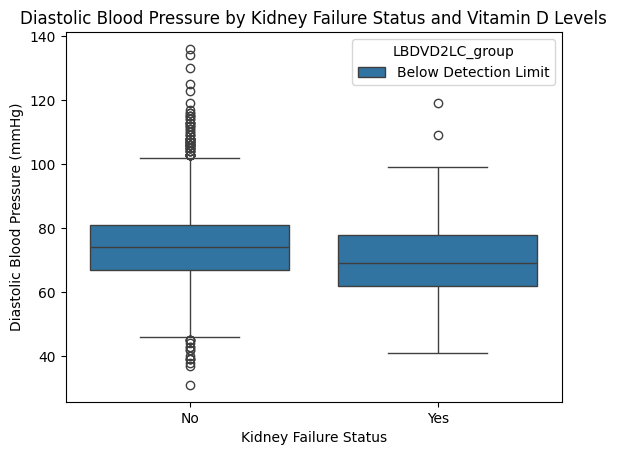

In [290]:
# Visualize the relationship between Diastolic Blood Pressure [BPXODI3] and the combination of Vitamin D levels [LBDVD2LC] and Kidney Failure [KIQ022] using a box plot
sns.boxplot(x='KIQ022_group', y='BPXODI3', data=kidney_vid_merged_anova, hue='LBDVD2LC_group')
# Add labels and title
plt.xlabel("Kidney Failure Status")
plt.ylabel("Diastolic Blood Pressure (mmHg)")
plt.title("Diastolic Blood Pressure by Kidney Failure Status and Vitamin D Levels")

# Display the plot
plt.show()

This box plot visualizes the distribution of diastolic blood pressure across the four groups defined by Vitamin D levels and Kidney Failure status.

Based on this visualization and the ANOVA results:

*   You can observe differences in the median and distribution of diastolic blood pressure between the groups.
*   The plot visually supports the finding that Kidney Failure status is associated with differences in diastolic blood pressure. The groups with "Yes" for Kidney Failure appear to have generally higher diastolic blood pressure compared to the "No" Kidney Failure groups, within each Vitamin D level.
*   The plot also suggests that Vitamin D levels might be associated with differences in diastolic blood pressure, though the visual difference between the "Above Detection Limit" and "Below Detection Limit" groups within each Kidney Failure status might be less pronounced than the difference related to Kidney Failure.
*   The relative parallelism of the boxes or median lines across the Vitamin D levels within each Kidney Failure status visually aligns with the ANOVA finding of no statistically significant interaction effect. This suggests that the effect of Vitamin D on diastolic pressure is similar for those with and without kidney failure, and vice versa.

This visualization provides a helpful complement to the statistical results, allowing for a more intuitive understanding of how these factors relate to diastolic blood pressure in your data.